In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

Using TensorFlow backend.
/Users/shilpaagrawal/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shilpaagrawal/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shilpaagrawal/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shilpaagrawal/anaconda3/l

* Get the stock data from Yahoo finance as a CSV for any company. 
* Drop all other columns (Volume, Year, Month and Day) and retain Open, High and Close - since I'm just predicting the close value for a day

In [2]:
def get_stock_data(normalized=0):
    url = "stock-data.csv"
    col_names = ['date','open_aapl','high_aapl','low_aapl','close_aapl','volume_aapl',
                'open_amzn','high_amzn','low_amzn','close_amzn','volume_amzn',
                'open_fb','high_fb','low_fb','close_fb','volume_fb',
                'open_googl','high_googl','low_googl','close_googl','volume_googl',
                'open_nflx','high_nflx','low_nflx','close_nflx','volume_nflx']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
#     date_split = df['date'].str.split(' ').str
#     df['Year'], df['Month'], df['Day'] = date_split
    df["volume_aapl"] = df["volume_aapl"] / 10000
    df["volume_amzn"] = df["volume_amzn"] / 10000
    df["volume_fb"] = df["volume_fb"] / 10000
    df["volume_googl"] = df["volume_googl"] / 10000
    df["volume_nflx"] = df["volume_nflx"] / 10000
    return df

In [3]:
df = get_stock_data(0)
df.head()

,date,open_aapl,high_aapl,low_aapl,close_aapl,volume_aapl,open_amzn,high_amzn,low_amzn,close_amzn,...,open_googl,high_googl,low_googl,close_googl,volume_googl,open_nflx,high_nflx,low_nflx,close_nflx,volume_nflx
0,2012-05-18 00:00:00,76.279999,74.597145,77.629997,75.768570,18307.31,219.410004,212.809998,219.630005,213.850006,...,312.862854,298.648651,316.526520,300.500488,1193.50,10.328571,9.337143,10.392858,9.994286,2941.54
1,2012-05-21 00:00:00,76.357140,76.292854,80.220001,80.182854,15777.65,214.029999,212.820007,219.979996,218.110001,...,300.555542,300.300293,308.153168,307.362366,614.46,9.978572,9.650000,10.312857,10.248571,2514.33
2,2012-05-22 00:00:00,81.364288,78.940002,81.982857,79.567146,17371.76,218.309998,213.960007,218.869995,215.330002,...,307.027039,298.298309,307.212219,300.700714,609.76,10.257143,9.607142,10.342857,9.672857,4001.48
3,2012-05-23 00:00:00,79.642860,79.032860,81.828575,81.508568,14622.44,214.710007,211.179993,217.550003,217.279999,...,301.126129,298.858856,305.105103,305.035034,634.98,9.638572,9.595715,10.307143,10.272857,4410.00
4,2012-05-24 00:00:00,82.267143,80.175713,82.357140,80.760002,12405.75,216.979996,212.699997,217.660004,215.240005,...,304.884888,299.734741,306.266266,302.132141,377.88,10.217143,9.928572,10.241428,10.038571,2074.24


In [4]:
df.drop(df.columns[[0,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis=1, inplace=True)
df.head()

,open_aapl,high_aapl,low_aapl,close_aapl,volume_aapl
0,76.279999,74.597145,77.629997,75.768570,18307.31
1,76.357140,76.292854,80.220001,80.182854,15777.65
2,81.364288,78.940002,81.982857,79.567146,17371.76
3,79.642860,79.032860,81.828575,81.508568,14622.44
4,82.267143,80.175713,82.357140,80.760002,12405.75


<h2>Normalizing and removing the null data points</h2>

In [5]:
df['open_aapl'] = df['open_aapl']/100
df['high_aapl'] = df['high_aapl']/100
df['volume_aapl'] = df['volume_aapl']*100
df['close_aapl'] = df['close_aapl']/100
print(df)
# nan_value_index = []
# High = df.High.isnull()
# for i in range(0, len(High)):
#     if High[i] == 1:
#         nan_value_index.append(i)
#         df['High'][i] = 0
# Open = df.Open.isnull()
# for i in range(0, len(Open)):
#     if Open[i] == 1:
#         nan_value_index.append(i)
#         df['Open'][i] = 0
# Volume = df.Volume.isnull()
# for i in range(0, len(Volume)):
#     if Volume[i] == 1:
#         nan_value_index.append(i)
#         df['Volume'][i] = 0
# Close = df.Close.isnull()
# for i in range(0, len(Close)):
#     if Close[i] == 1:
#         nan_value_index.append(i)
#         df['Close'][i] = 0

      open_aapl  high_aapl    low_aapl  close_aapl  volume_aapl
0      0.762800   0.745971   77.629997    0.757686    1830731.0
1      0.763571   0.762929   80.220001    0.801829    1577765.0
2      0.813643   0.789400   81.982857    0.795671    1737176.0
3      0.796429   0.790329   81.828575    0.815086    1462244.0
4      0.822671   0.801757   82.357140    0.807600    1240575.0
5      0.806557   0.797814   80.835716    0.803271     821268.0
6      0.815571   0.807586   82.000000    0.817529     951272.0
7      0.813143   0.809371   82.855713    0.827386    1323574.0
8      0.829629   0.816371   83.071426    0.825329    1229186.0
9      0.813086   0.800743   81.807144    0.801414    1302469.0
10     0.802143   0.783571   81.071426    0.806129    1392489.0
11     0.801814   0.797614   80.924286    0.804043     970536.0
12     0.811100   0.807857   81.978569    0.816371    1003639.0
13     0.824700   0.815000   82.474289    0.816743     949417.0
14     0.816571   0.812857   82.940002  

In [6]:
X = df[['high_aapl','open_aapl', 'volume_aapl']]
Y = df[['close_aapl']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [7]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1539, 3)
y_train (1539, 1)
X_test (385, 3)
y_test (385, 1)


<h2>Compiling and training the neural network model</h2>

In [8]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)


Train on 1462 samples, validate on 77 samples
Epoch 1/10
1462/1462 [==============================] - 1s 659us/step - loss: 4140.1348 - val_loss: 422.7361
Epoch 2/10
1462/1462 [==============================] - 0s 33us/step - loss: 1017.8033 - val_loss: 79.4139
Epoch 3/10
1462/1462 [==============================] - 0s 28us/step - loss: 207.3008 - val_loss: 6.6759
Epoch 4/10
1462/1462 [==============================] - 0s 30us/step - loss: 61.8406 - val_loss: 18.4274
Epoch 5/10
1462/1462 [==============================] - 0s 35us/step - loss: 27.4558 - val_loss: 0.5654
Epoch 6/10
1462/1462 [==============================] - 0s 56us/step - loss: 7.7574 - val_loss: 1.1969
Epoch 7/10
1462/1462 [==============================] - 0s 31us/step - loss: 2.8795 - val_loss: 3.9138
Epoch 8/10
1462/1462 [==============================] - 0s 28us/step - loss: 1.1333 - val_loss: 2.8213
Epoch 9/10
1462/1462 [==============================] - 0s 34us/step - loss: 0.8383 - val_loss: 2.2359
Epoch 10/10

<h2>Predicted Values</h2>

In [9]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.23269707]
 [0.18425995]
 [0.21824223]
 [0.22954613]
 [0.25870472]
 [0.20973355]
 [0.24683625]
 [0.23669392]
 [0.1657911 ]
 [0.19823891]]


Execute the trained model

<h2>Calculating the error in the trained Neural Network model</h2>

In [10]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.74 MSE (0.86 RMSE)
Test Score: 2.98 MSE (1.73 RMSE)


<h2>Predictions vs Real results</h2>

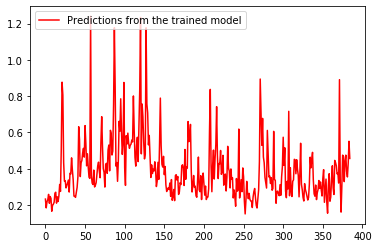

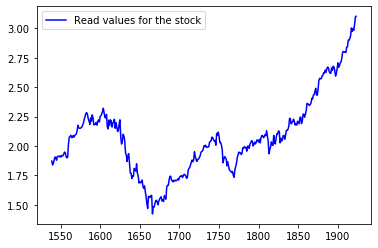

In [11]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()